In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [9]:
df.isnull().sum()


BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [11]:
#to check for the categorical features
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [13]:
df.shape

(1460, 4)

<AxesSubplot:xlabel='BsmtQual'>

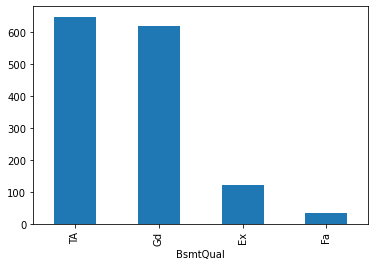

In [19]:
#compute the frequency with every features
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

In [20]:
df.groupby(['BsmtQual'])['BsmtQual'].value_counts().index[0]

('Ex', 'Ex')

In [28]:
#relacing function or impute function
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [30]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature) 

In [31]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [36]:
#all the values gets replaced by zero


In [39]:
df['BsmtQual-var']=np.where(df['BsmtQual'].isnull(),1,0)

In [42]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual-var
0,0,Gd,Attchd,208500,0
1,0,TA,Attchd,181500,0
2,0,TA,Attchd,223500,0
3,0,Gd,Detchd,140000,0
4,0,TA,Attchd,250000,0


In [43]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [44]:
df['BsmtQual-var']=np.where(df['BsmtQual'].isnull(),1,0)

In [45]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual-var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [48]:
frequent=df['BsmtQual'].mode()[0]

In [49]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [50]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual-var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [55]:
df['FireplaceQu-var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]

In [56]:
df['FireplaceQu'].fillna(frequent,inplace=True)

In [58]:
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Advanced-House-Price-Prediction-/master/train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
...,...,...,...,...
1455,Gd,TA,Attchd,175000
1456,Gd,TA,Attchd,210000
1457,TA,Gd,Attchd,266500
1458,TA,NaN,Attchd,142125


In [59]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
#suppose we have more frequent categort we will replace nan with new category
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),'unknown',df[variable])

In [62]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature) 

In [63]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,unknown,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [66]:
#later the feature has been drop from the datset
df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)#because the original features are not required

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,unknown,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
...,...,...,...,...
1455,175000,Gd,TA,Attchd
1456,210000,Gd,TA,Attchd
1457,266500,TA,Gd,Attchd
1458,142125,TA,unknown,Attchd
